In [1]:
import numpy as np
import pandas as pd
import os
import glob
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/content/drive/MyDrive/DeepLearning/data/Face Mask Dataset/'

In [3]:
dataset = {
    "image_path": [],
    "mask_status": [],
    "where":[]
}

# print(path +"/"+ where)

for where in os.listdir(path):
  for status in os.listdir(path + where):
    for image in glob.glob(path + where + "/" + status + "/" + "*.png"):
      dataset["image_path"].append(image)
      dataset["mask_status"].append(status)
      dataset["where"].append(where)

dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,/content/drive/MyDrive/DeepLearning/data/Face ...,WithoutMask,Validation
1,/content/drive/MyDrive/DeepLearning/data/Face ...,WithoutMask,Validation
2,/content/drive/MyDrive/DeepLearning/data/Face ...,WithoutMask,Validation
3,/content/drive/MyDrive/DeepLearning/data/Face ...,WithoutMask,Validation
4,/content/drive/MyDrive/DeepLearning/data/Face ...,WithoutMask,Validation


With Mask 5909
Without Mask 5883


<Axes: xlabel='mask_status', ylabel='count'>

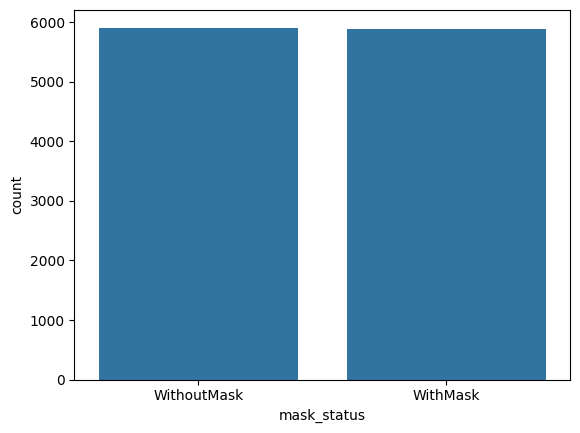

In [4]:
import seaborn as sns

print('With Mask', dataset.value_counts('mask_status').iloc[0])
print('Without Mask', dataset.value_counts('mask_status').iloc[1])

sns.countplot(x = dataset['mask_status'])

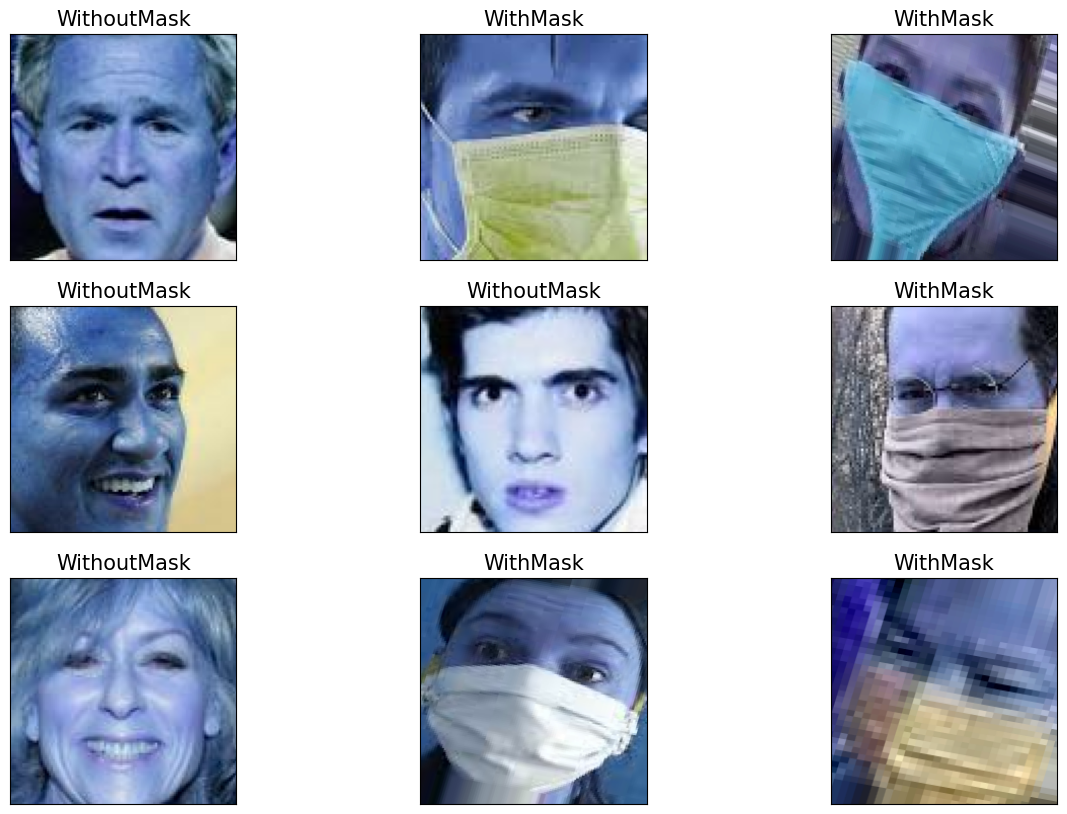

In [5]:
import cv2

plt.figure(figsize=(15,10))

for i in range(9):
  random = np.random.randint(1, len(dataset))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.imread(dataset.loc[random, "image_path"]))
  plt.title(dataset.loc[random, "mask_status"], size=15)
  plt.xticks([])
  plt.yticks([])
plt.show()


In [6]:
train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))

                                             image_path  mask_status  where
1792  /content/drive/MyDrive/DeepLearning/data/Face ...  WithoutMask  Train
1793  /content/drive/MyDrive/DeepLearning/data/Face ...  WithoutMask  Train
1794  /content/drive/MyDrive/DeepLearning/data/Face ...  WithoutMask  Train
1795  /content/drive/MyDrive/DeepLearning/data/Face ...  WithoutMask  Train
1796  /content/drive/MyDrive/DeepLearning/data/Face ...  WithoutMask  Train
1797  /content/drive/MyDrive/DeepLearning/data/Face ...  WithoutMask  Train
1798  /content/drive/MyDrive/DeepLearning/data/Face ...  WithoutMask  Train
1799  /content/drive/MyDrive/DeepLearning/data/Face ...  WithoutMask  Train
1800  /content/drive/MyDrive/DeepLearning/data/Face ...  WithoutMask  Train
1801  /content/drive/MyDrive/DeepLearning/data/Face ...  WithoutMask  Train


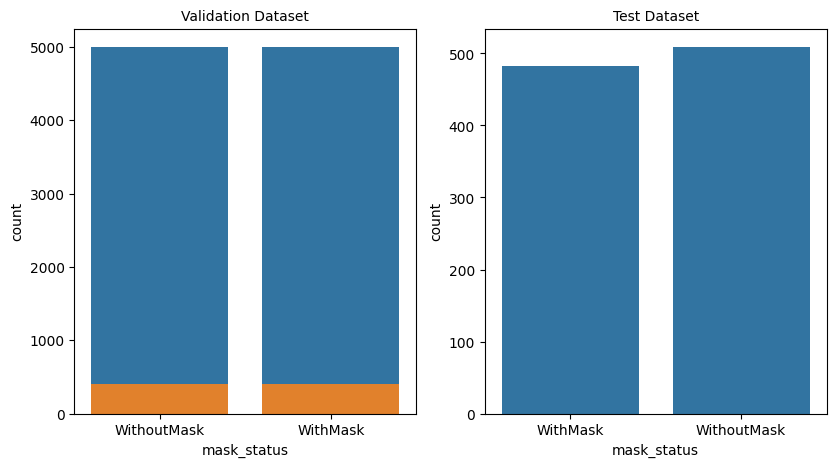

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=train_df["mask_status"])
plt.title("Training Dataset", size=10)

plt.subplot(1,3,2)
sns.countplot(x=test_df["mask_status"])
plt.title("Test Dataset", size=10)

plt.subplot(1,3,1)
sns.countplot(x=valid_df["mask_status"])
plt.title("Validation Dataset", size=10)

plt.show()

In [8]:
train_df = train_df.reset_index().drop("index", axis=1)
train_df.head()

,image_path,mask_status,where
0,/content/drive/MyDrive/DeepLearning/data/Face ...,WithoutMask,Train
1,/content/drive/MyDrive/DeepLearning/data/Face ...,WithoutMask,Train
2,/content/drive/MyDrive/DeepLearning/data/Face ...,WithoutMask,Train
3,/content/drive/MyDrive/DeepLearning/data/Face ...,WithoutMask,Train
4,/content/drive/MyDrive/DeepLearning/data/Face ...,WithoutMask,Train


In [9]:
data = []
image_size = 150

for i in range(len(train_df)):
  ## Converting the image into grayscale
  img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)

  ## Resizing the array
  new_img_array = cv2.resize(img_array, (image_size, image_size))

  ## Encoding the image with the label
  if train_df["mask_status"][i] == "WithMask":
    data.append([new_img_array, 1])
  else:
    data.append([new_img_array, 0])

In [10]:
np.random.shuffle(data)

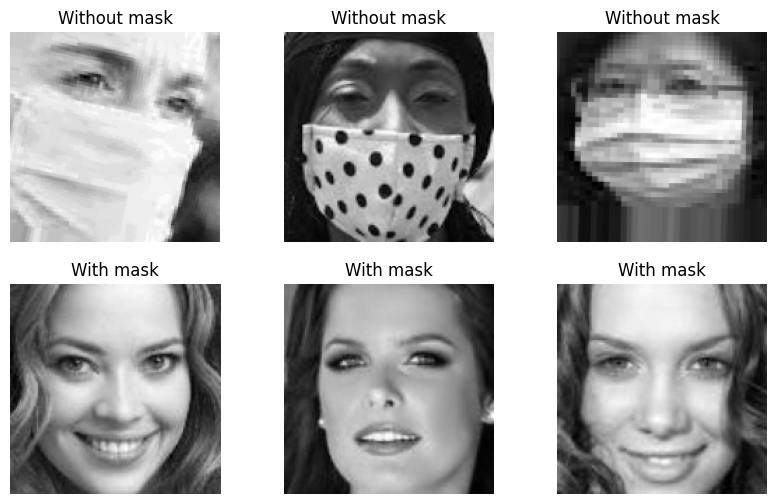

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(10,6))

for row in range(2):
  for col in range(3):
    image_index = row*100+col

    ax[row, col].axis("off")
    ax[row, col].imshow(data[image_index][0], cmap = "gray")

    if data[image_index][1] == 1:
      ax[row, col].set_title("Without mask")
    else :
      ax[row, col].set_title("With mask")

plt.show()

In [12]:
data[0]

[array([[207, 205, 205, ..., 219, 207, 206],
        [207, 207, 207, ..., 219, 205, 199],
        [206, 206, 206, ..., 202, 192, 195],
        ...,
        [178, 178, 178, ...,  80,  88,  91],
        [178, 178, 178, ...,  80,  89,  91],
        [178, 178, 178, ...,  80,  91,  91]], dtype=uint8),
 1]

In [13]:
X = []
y = []

for image in data:
  X.append(image[0])
  y.append(image[1])

X = np.array(X)
y = np.array(y)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [15]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu',input_shape=(150,150,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, (2,2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │      87,617,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,627,089 (334.27 MB)

 Trainable params: 87,627,089 (334.27 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
x_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 780s 3s/step - accuracy: 0.7643 - loss: 273.6681
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 778s 3s/step - accuracy: 0.9780 - loss: 0.0632
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 802s 3s/step - accuracy: 0.9832 - loss: 0.0515
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 764s 3s/step - accuracy: 0.9853 - loss: 0.0401
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 782s 3s/step - accuracy: 0.9895 - loss: 0.0287


In [ ]:
model.evaluate(X_val, y_val)

63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 552ms/step - accuracy: 0.9668 - loss: 0.1261


[0.11288990825414658, 0.968999981880188]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = (model.predict(X_val) > 0.5).astype("int32")

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 492ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       977
           1       0.97      0.96      0.97      1023

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

[[951  26]
 [ 36 987]]


In [ ]:
model2 = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(150,150,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.Maxpooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: module 'tensorflow.keras.layers' has no attribute 'Maxpooling2D'

In [ ]:
model2.compile(optimizer='adam', loss=tf.keras.losses.binaryCrossentropy(), metrics=['accuracy'])

In [ ]:
X = []
y = []

for image in data:
  X.append(image[0])
  y.append(image[1])

X = np.array(X)
y = np.array(y)

x = x / 255

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model2.fit(X_train, y_train, epochs=5, batch_size=32)

In [ ]:
model2.evaluate(X_val, y_val)

In [ ]:
wrong_result = []

for n in range(0, len(y_val)):
  if prediction[n] != y_val[n]:
    wrong_result.append(n)

print(wrong_result)

In [ ]:
import random

samples = random.choices(population=wrong_result, k=6)

plt.figure(figsize=(14, 12))

for idx, n, in enumerate(samples):
  plt.subplot(3, 2, idx+1)
  plt.imshow(X_val[n].reshape(150, 150), interpolation='nearest')
  plt.axis('off')

plt.show()